# brian canela

In [1]:
### Importing the required packages and libraries
# we will need numpy and pandas later
import numpy as np
import pandas as pd

#import LogisticRegression Class
from sklearn.linear_model import LogisticRegression
#import DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Randomly splitting the original dataset into training set and testing set
from sklearn.model_selection import train_test_split

In [2]:
# reading a CSV file directly from Web, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:
#walmart_features_df =  pd.read_csv('features.csv')

#walmart_sampleSubmission_df =  pd.read_csv('sampleSubmission.csv')

#walmart_stores_df =  pd.read_csv('stores.csv')

#walmart_test_df =  pd.read_csv('test.csv')

#walmart_train_df =  pd.read_csv('train.csv')

In [3]:
def mergeData(df):
    features =pd.read_csv('features.csv')
    storesdata =pd.read_csv('stores.csv')
    df = pd.merge(df, features, on=['Store','Date','IsHoliday'],how='inner')
    df = pd.merge(df, storesdata, on=['Store'], how='inner')
    return df

In [4]:
merged_df = mergeData(pd.read_csv('train.csv'))

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [6]:
merged_df.fillna(value=0, inplace=True)

In [7]:
#adding all the markdown sales and putting it in one column
merged_df['Markdowns'] = merged_df['MarkDown1'] + merged_df['MarkDown2'] + merged_df['MarkDown3'] + merged_df['MarkDown4'] + merged_df['MarkDown5'] 
labelsToDrop = ['MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4','MarkDown5']
merged_df.drop(labels=labelsToDrop,axis=1, inplace=True)

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
Markdowns       421570 non-null float64
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 39.0+ MB


In [9]:
merged_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size,Markdowns
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739,6684.041435
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328,14750.941552
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000,0.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000,0.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000,0.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000,8075.260000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000,160510.610000


In [10]:
#Looking At the Date with the most weekley_Sales based on Date. Black Friday Week and days before and on Christmas Eve.
merged_df.loc[merged_df['Weekly_Sales']>300000,"Date"].value_counts()

2010-11-26    14
2011-11-25    13
2010-12-24     5
2011-12-23     2
Name: Date, dtype: int64

In [11]:
from pandas import DatetimeIndex
df = merged_df
df.Date = pd.to_datetime(df.Date)

In [12]:
df['Year'] = DatetimeIndex(df['Date']).year
df['Month']= DatetimeIndex(df['Date']).month
df['Day'] = DatetimeIndex(df['Date']).day
df = df.drop(columns=['Date'])
df[0::1000]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Markdowns,Year,Month,Day
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,0.00,2010,2,5
1000,1,81,31614.83,False,72.55,2.835,210.339968,7.808,A,151315,0.00,2010,5,7
2000,1,95,131288.83,False,87.00,2.692,211.639421,7.787,A,151315,0.00,2010,8,13
3000,1,81,29383.02,False,51.41,2.771,211.889674,7.838,A,151315,0.00,2010,11,19
4000,1,79,30624.72,False,62.90,3.065,213.535609,7.742,A,151315,0.00,2011,2,25
5000,1,72,34638.69,False,83.00,3.699,215.273655,7.682,A,151315,0.00,2011,6,3
6000,1,85,2681.87,True,76.00,3.546,215.861056,7.962,A,151315,0.00,2011,9,9
7000,1,60,1443.20,False,51.63,3.159,219.179453,7.866,A,151315,9662.85,2011,12,16
8000,1,44,4356.74,False,65.93,3.787,221.286413,7.348,A,151315,10216.95,2012,3,23
9000,1,56,2159.46,False,84.88,3.286,221.843400,7.143,A,151315,8776.29,2012,6,29


# Doing Logisitc Regression

In [13]:
#creating the feature matrix 
feature_cols = ['Store', 'Temperature','Fuel_Price','CPI','Unemployment', 'Markdowns', 'Size', 'Dept', 'Weekly_Sales', 'Year', 'Month', 'Day']
X = df[feature_cols]

In [14]:
#Series of labels
y = df['IsHoliday']
y[0::10]

0         False
10        False
20        False
30        False
40        False
50        False
60        False
70        False
80         True
90         True
100        True
110        True
120        True
130        True
140        True
150       False
160       False
170       False
180       False
190       False
200       False
210       False
220       False
230       False
240       False
250       False
260       False
270       False
280       False
290       False
          ...  
421270    False
421280    False
421290    False
421300    False
421310    False
421320    False
421330    False
421340    False
421350    False
421360    False
421370    False
421380    False
421390    False
421400    False
421410    False
421420    False
421430    False
421440    False
421450    False
421460    False
421470    False
421480    False
421490    False
421500    False
421510    False
421520    False
421530    False
421540    False
421550    False
421560    False
Name: IsHoliday, Length:

In [15]:
#logreg instantiated as an object of LogisticRegression
logreg = LogisticRegression()

In [16]:
#Randomly Splitting the original dataset into training set and testing set. 30% of data samples for testing, and rest 70% for training.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [17]:
print(X_train.shape)
print(y_train.shape)

(295099, 12)
(295099,)


In [18]:
print(X_test.shape)
print(y_test.shape)

(126471, 12)
(126471,)


In [19]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
y_predict_logreg = logreg.predict(X_test)
print(y_predict_logreg)

[False False False ... False False False]


# Accuracy Evaluation Using Logistic Regression

In [21]:
score_logreg = accuracy_score(y_test, y_predict_logreg)
print(score_logreg)

0.9314467348245843


# # Cross-Validation

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
#Applying 10-fold CV for logistic Regression 

#creating the feature matrix 
accuracy_cv_list = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

print(accuracy_cv_list)

[0.92957446 0.93139929 0.9332258  0.93426952 0.93310719 0.93600114
 0.92793605 0.93305975 0.92964395 0.92949995]


In [24]:
accuracy_list = accuracy_cv_list.mean()

In [25]:
print(accuracy_list)

0.9317717103339767


In [26]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Markdowns,Year,Month,Day
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5
1,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5
2,1,3,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5
3,1,4,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5
4,1,5,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5


In [27]:
def categorical_to_numeric(x):
    if x == False:
        return 0
    elif x == True:
        return 1

In [28]:
df['IsHoliday'] = df['IsHoliday'].apply(categorical_to_numeric)

In [29]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Markdowns,Year,Month,Day
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,A,151315,0.0,2010,2,5


In [30]:
#creating the feature matrix 
feature_cols_ = ['Store','Dept','Weekly_Sales','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Type','Size','Markdowns','Year','Month','Day']
X = df[feature_cols]

In [31]:
#Series of labels
y = df['IsHoliday']
y[0::10]

0         0
10        0
20        0
30        0
40        0
50        0
60        0
70        0
80        1
90        1
100       1
110       1
120       1
130       1
140       1
150       0
160       0
170       0
180       0
190       0
200       0
210       0
220       0
230       0
240       0
250       0
260       0
270       0
280       0
290       0
         ..
421270    0
421280    0
421290    0
421300    0
421310    0
421320    0
421330    0
421340    0
421350    0
421360    0
421370    0
421380    0
421390    0
421400    0
421410    0
421420    0
421430    0
421440    0
421450    0
421460    0
421470    0
421480    0
421490    0
421500    0
421510    0
421520    0
421530    0
421540    0
421550    0
421560    0
Name: IsHoliday, Length: 42157, dtype: int64

In [32]:
#logreg instantiated as an object of LogisticRegression
lr = LogisticRegression()

In [33]:
#Randomly Splitting the original dataset into training set and testing set. 30% of data samples for testing, and rest 70% for training.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [34]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# ESTIMATING THE PROBABILITY OF EVENT THAT ITS A HOLIDAY

In [35]:
##
y_predict_prob_lr = logreg.predict_proba(X_test)

In [36]:
#predicting the estimated likelihood of both label for testing sets
print(y_predict_prob_lr)

print("\n")

#line prints the estimated likelihood of label=1" for testing set
print(y_predict_prob_lr[:,1])
print("\n")

#predicts the actual label of the testing set
print(y_test)
print("\n")

#line prints the actual label of the testing set
print(y_predict_logreg)

[[0.96620662 0.03379338]
 [0.94174606 0.05825394]
 [0.95451474 0.04548526]
 ...
 [0.96165411 0.03834589]
 [0.93499821 0.06500179]
 [0.9519059  0.0480941 ]]


[0.03379338 0.05825394 0.04548526 ... 0.03834589 0.06500179 0.0480941 ]


29055     1
18234     0
305942    0
72240     0
353819    0
175011    0
328880    0
395084    0
394804    0
371107    0
399715    0
313028    0
140484    0
217284    0
130104    0
140278    1
338782    0
395270    0
359658    0
130236    0
305887    0
153450    0
336667    0
173970    0
86457     0
318162    0
176847    0
43762     0
208010    0
396769    0
         ..
14768     0
327296    1
240593    0
19234     0
1060      0
59993     0
225071    0
367104    0
178605    0
209311    1
250795    0
56489     0
272267    0
1337      0
324326    0
27628     0
337948    0
323537    0
223373    0
385629    0
399899    0
88820     0
196315    0
83491     0
145750    0
224582    0
209005    0
397115    0
310009    0
56663     0
Name: IsHoliday, Length: 126471, dty

In [37]:
from sklearn import metrics
#check dataset, predict whatever is dataset, 
#the function moves threadshold and detects , remember change pos_label to whatever it is, pos_leabel is define by u, so this 
#pos_label=1 this is for prediciting isHolday is true!
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)

print(fpr) # false alarm

print(tpr) #true positive

[0.00000000e+00 0.00000000e+00 8.50397986e-06 ... 9.88749235e-01
 9.88749235e-01 1.00000000e+00]
[1.12625296e-04 1.68937943e-03 1.68937943e-03 ... 9.99887375e-01
 1.00000000e+00 1.00000000e+00]


In [38]:
#auc
AUC = metrics.auc(fpr, tpr)
print("Area Under the Curve: ", AUC)

Area Under the Curve:  0.6754093208109289


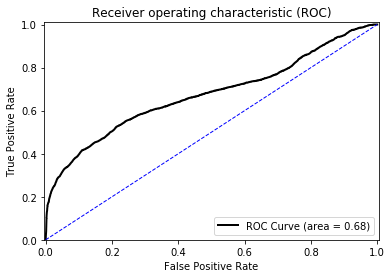

In [39]:
    #ROC CURVE
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='black', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

plt.show()